In [1]:
import pandas as pd
import os
import git
import matplotlib.pyplot as plt
import pickle

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option("display.max_rows", 1000)

In [3]:
## get top git dir
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [4]:
## return the unique selected users (DataFrame) for each year interval 
def get_users(data,sel_users=None):
    years = [2015,2016,2017,2018]
    existing_users = []
    users_final = []
    data["tweetCreatedAt"] = pd.to_datetime(data["tweetCreatedAt"])
    data = data.sort_values(by="tweetCreatedAt")
    for year in years:
        if (sel_users is not None):
            users = (data["userID"].loc[(data.tweetCreatedAt.dt.year == year) & 
                                             (data.userID.isin(sel_users))].unique())
        else:
            users = (data["userID"].loc[(data.tweetCreatedAt.dt.year == year)]) 
        add_users = list(set(users) - set(existing_users))
        users_final.append([year,len(add_users)])
        existing_users.extend(list(set(add_users)))
    users_final = pd.DataFrame(users_final,columns=["year","user_count"])
    return users_final

In [5]:
top_dir = get_git_root(os.getcwd())
input_dir = os.path.join(top_dir,"input")

In [7]:
juul_data  = pd.read_csv(os.path.join(input_dir,"juul_data.csv"),lineterminator="\n")
# weed_data = pd.read_csv(os.path.join(input_dir,"weed_data.csv"),lineterminator="\n")

In [8]:
## growth of poly and mono users
model_dir = os.path.join(get_git_root(os.getcwd()),"models")
poly_dir = os.path.join(model_dir,"poly_users")
poly_users = pickle.load(open(os.path.join(poly_dir,"poly_users.pkl"),"rb"))
regular_users = pickle.load(open(os.path.join(poly_dir,"regular_users.pkl"),"rb"))
mono_users = pickle.load(open(os.path.join(poly_dir,"mono_users.pkl"),"rb"))
# datset = pd.read_csv(os.path.join(input_dir,"dataset.csv"),lineterminator="\n")

In [79]:
## input data :juul_data 
juul_data = pd.read_csv(os.path.join(input_dir,"juul_data.csv"),lineterminator="\n")
juul_data["tweetCreatedAt"] = pd.to_datetime(juul_data["tweetCreatedAt"])

## growth of users and tweets

In [ ]:
# juul_data["tweetCreatedAt"].dt.year
data_growth = juul_data.groupby(by=[juul_data["tweetCreatedAt"].dt.year])["tweetId"].count().reset_index()
data_growth.columns = ["createdAt","count"]
data_growth["createdAt"] = pd.to_datetime(data_growth["createdAt"])

In [150]:
## looking at only unique users
users_final = get_users(juul_data)

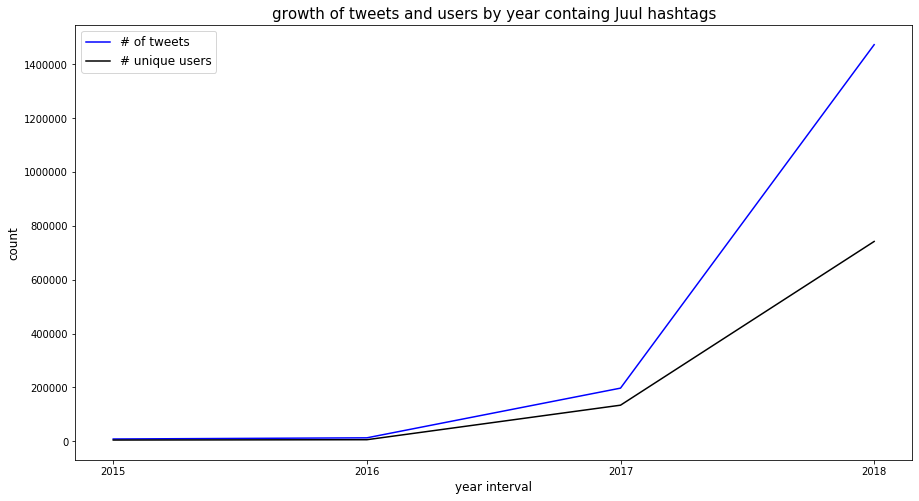

In [165]:
# data_growth = pd.DataFrame(data_growth)
plt.figure(figsize=(15,8))
plt.plot([str(ele) for ele in list(data_growth["createdAt"])],list(data_growth["count"]),label="# of tweets",color='b')
plt.plot([str(ele) for ele in list(users_final.year)],list(users_final["user_count"]),label="# unique users",color='black')
plt.plot()
plt.xlabel("year interval",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.title("growth of tweets and users by year containg Juul hashtags",fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [ ]:
juul_data["hashtags"].fillna(value=np.nan, inplace=True)
juul_data["hashtags"].replace('None',"[]", inplace=True)

In [75]:
import numpy as np
import ast
def check_juul(list_):
    if list_!= (np.nan and None):
        a = ast.literal_eval(list_)
        if isinstance(a, list):
            for ele in a:
                if ele.lower() == 'juul':
                    return True
            return False
    return False

In [88]:
juul_data.loc[juul_data.userID == 2918018660]

,favourites_count,followersCount,friendsCount,hashtags,imageurl,lang,listedCount,retweetCount,retweetText,retweeted,statusesCount,tweetCreatedAt,tweetId,tweetText,url,userCreatedAt,userDescription,userID,userLocation,userName
1927,649.0,25750,0,NaN,http://pbs.twimg.com/profile_images/1113115296930209792/HrAYK8aR_normal.png,en,61,34,"Vaporization Startup Pax Labs Introduces Juul, Its Next-Gen E-Cigarette http://t.co/Gma0pSRS0z by @ryanlawler",True,8601,2015-04-21 16:20:27,590550676436037632,"RT @TechCrunch: Vaporization Startup Pax Labs Introduces Juul, Its Next-Gen E-Cigarette http://t.co/Gma0pSRS0z by @ryanlawler",https://t.co/Tqdlt1Sed9,2014-12-03 23:28:22,"USA-based account. Must be 21+ to follow. For customer service support, visit https://t.co/Tqdlt1Sed9.",2918018660,San Francisco,JUUL Labs
1940,649.0,25758,0,NaN,http://pbs.twimg.com/profile_images/1113115296930209792/HrAYK8aR_normal.png,pl,61,2,JUUL by @PAXvapor is a masterpiece: http://t.co/nFUbf5R1pH http://t.co/9MuYwyUDCl,True,8601,2015-04-21 17:11:23,590563493033734147,RT @CandyandPizza: JUUL by @PAXvapor is a masterpiece: http://t.co/nFUbf5R1pH http://t.co/9MuYwyUDCl,https://t.co/Tqdlt1Sed9,2014-12-03 23:28:22,"USA-based account. Must be 21+ to follow. For customer service support, visit https://t.co/Tqdlt1Sed9.",2918018660,San Francisco,JUUL Labs
2001,649.0,25750,0,['JUUL'],http://pbs.twimg.com/profile_images/1113115296930209792/HrAYK8aR_normal.png,en,61,0,NaN,False,8601,2015-04-21 21:06:14,590622593671176195,Absolutely! Sign up to hear when #JUUL becomes available &amp; get 25% off your first purchase here: https://t.co/2hVKBrRCak @larry_90066,https://t.co/Tqdlt1Sed9,2014-12-03 23:28:22,"USA-based account. Must be 21+ to follow. For customer service support, visit https://t.co/Tqdlt1Sed9.",2918018660,San Francisco,JUUL Labs
2110,649.0,25751,0,['JUUL'],http://pbs.twimg.com/profile_images/1113115296930209792/HrAYK8aR_normal.png,en,61,0,NaN,False,8601,2015-04-23 17:53:47,591298940215103488,"@jaxter0ne Thanks Jaxter! At this time we will only be selling #JUUL in the US, but we hope to expand in the future. Please stay tuned.",https://t.co/Tqdlt1Sed9,2014-12-03 23:28:22,"USA-based account. Must be 21+ to follow. For customer service support, visit https://t.co/Tqdlt1Sed9.",2918018660,San Francisco,JUUL Labs
2111,649.0,25750,0,['JUUL'],http://pbs.twimg.com/profile_images/1113115296930209792/HrAYK8aR_normal.png,en,61,0,NaN,False,8601,2015-04-23 17:55:15,591299308063956994,"@Farnots Hey Lucas, at this time we will only be selling #JUUL in the US, but we hope to expand in the future. Please stay tuned.",https://t.co/Tqdlt1Sed9,2014-12-03 23:28:22,"USA-based account. Must be 21+ to follow. For customer service support, visit https://t.co/Tqdlt1Sed9.",2918018660,San Francisco,JUUL Labs
2118,649.0,25757,0,['JUUL'],http://pbs.twimg.com/profile_images/1113115296930209792/HrAYK8aR_normal.png,en,61,0,NaN,False,8601,2015-04-23 18:49:25,591312939333906433,@Farnots #JUUL will only be shipping within the United States for the foreseeable future. We hope to be available to you eventually!,https://t.co/Tqdlt1Sed9,2014-12-03 23:28:22,"USA-based account. Must be 21+ to follow. For customer service support, visit https://t.co/Tqdlt1Sed9.",2918018660,San Francisco,JUUL Labs
2120,649.0,25755,0,['JUUL'],http://pbs.twimg.com/profile_images/1113115296930209792/HrAYK8aR_normal.png,en,61,0,NaN,False,8601,2015-04-23 19:07:22,591317457425555456,@Farnots No problem Lucas. Hope you get to enjoy #JUUL sooner than later.,https://t.co/Tqdlt1Sed9,2014-12-03 23:28:22,"USA-based account. Must be 21+ to follow. For customer service support, visit https://t.co/Tqdlt1Sed9.",2918018660,San Francisco,JUUL Labs
2153,649.0,25758,0,['JUUL'],http://pbs.twimg.com/profile_images/1113115296930209792/HrAYK8aR_normal.png,en,61,0,NaN,False,8601,2015-04-24 15:34:11,591626193641734144,@__krisy @rxykim #JUUL will be available on our website for shipping within the US. Sign up for our newsletter and we'll let you know when.

In [61]:
df_users = get_users(datset,regular_users)

In [59]:
df_poly= get_users(datset,poly_users)

In [60]:
df_mono = get_users(datset,mono_users)

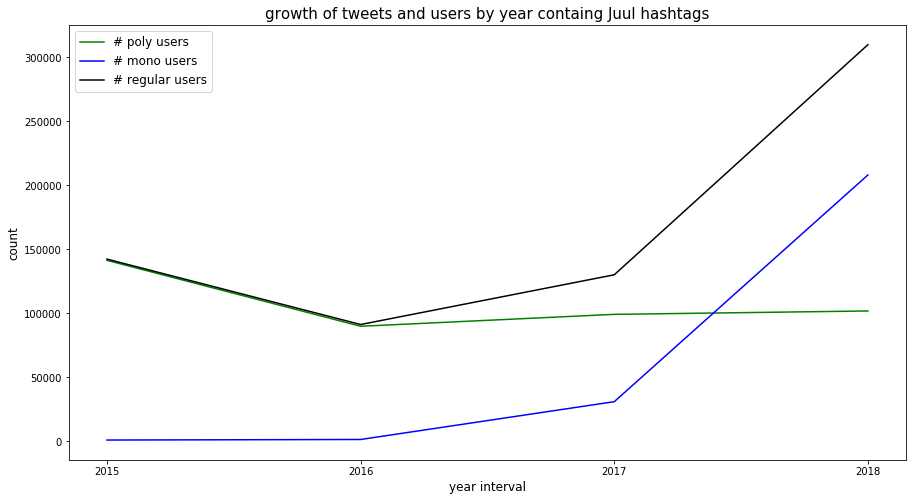

In [65]:
# data_growth = pd.DataFrame(data_growth)
plt.figure(figsize=(15,8))
plt.plot([str(ele) for ele in list(df_poly.year)],list(df_poly["user_count"]),label="# poly users",color='green')
plt.plot([str(ele) for ele in list(df_mono.year)],list(df_mono["user_count"]),label="# mono users",color='blue')
plt.plot([str(ele) for ele in list(df_users.year)],list(df_users["user_count"]),label="# regular users",color='black')
plt.xlabel("year interval",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.title("growth of tweets and users by year containg Juul hashtags",fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [17]:
## total cascades for juul data 
len(juul_data.loc[juul_data["retweetCount"] > 0])

1252524

In [9]:
## total cascades for weed data
len(weed_data.loc[weed_data["retweetCount"] > 0])

6079832

In [21]:
weed_data = weed_data[['userID',"tweetCreatedAt",'retweetCount','tweetText',"retweetText","retweeted"]]

In [25]:
weed_data["tweetText"].loc[weed_data["retweeted"] == True] = weed_data["retweetText"].loc[weed_data["retweeted"] == True]

In [29]:
weed_data = weed_data[['userID',"tweetCreatedAt",'retweetCount','tweetText']]

In [32]:
weed_data.to_csv(os.path.join(input_dir,"weed_data_rtcount"),index=False)